# Read and check muspeed files
20200623 weg started<br>
Generate with<br>
hitsBill 1 <equp file name><br>

In [2]:
%matplotlib notebook

import sys, os, glob, logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
lcolors = list( mcolors.TABLEAU_COLORS )

In [5]:
fdir = './'
fnamesAll = glob.glob('muspeed*.csv')
print(fnames)

['muspeed_17JUN2020_105422.csv', 'muspeed_8JUN2020_130712.csv', 'muspeed_20JUN2020_181313.csv', 'muspeed_17JUN2020_124637.csv']


Format of the muspeedXXX.csv are<br>
```hcp-129-59-117-130/gabe :<WedsCRMDS/6165 143 >head muspeed_17JUN2020_124637.csv
  200617, 64003.003317920,   10,   34,    4,   19,    5,   23,   10,   29
  200617, 64006.849329054,   35,   62,   35,   48,   30,   50,   40,   53
  200617, 64008.670135915,   36,   52,   28,   50,   30,   46,   37,   55
  200617, 64009.587643445,    8,   26,    1,   17,    0,   17,    5,   27
  ```
  
  with date, time, r0, f0, r1, f1, r2, f2, r3, f3<br>
  where r0 is the rising edge for channel 0 (1), and f0 is the falling edge for the same.  These are in units of "ticks" with 1 tick = 40/32 = 1.25 ns for the recent generation of cards.  the 40 ns comes from the 25 MHz on-board clock, that is subdivided by a 32 bit counter.

In [21]:
fnames = ['muspeed_8JUN2020_130712.csv', # This one is 12 gap 34
         'muspeed_20JUN2020_181313.csv']  # This one is 32 gap 14

In [22]:
# Load the data.
r0, f0, r1, f1, r2, f2, r3, f3 = np.loadtxt(fdir+fnames[0], delimiter=',', usecols=(2,3,4,5,6,7,8,9), unpack=True )

Length of r0 135443


<IPython.core.display.Javascript object>


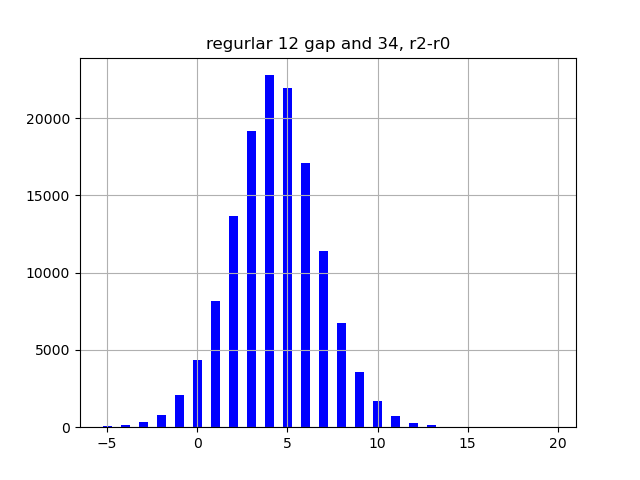

In [41]:
# Plot the histograms of rising edges only.
print(f'Length of r0 {len(r0)}' )

fig, ax = plt.subplots()

ax.hist(r2-r0, bins=50, range=(-5,20), color='b', align='left', label='rising ch0')

ax.set_title('regurlar 12 gap and 34, r2-r0')
ax.grid(True)

plt.show()

In [24]:
# Load the data.
r0sw, f0sw, r1sw, f1sw, r2sw, f2sw, r3sw, f3sw = np.loadtxt(fdir+fnames[1], delimiter=',', usecols=(2,3,4,5,6,7,8,9), unpack=True )

Length of r0 135443


<IPython.core.display.Javascript object>


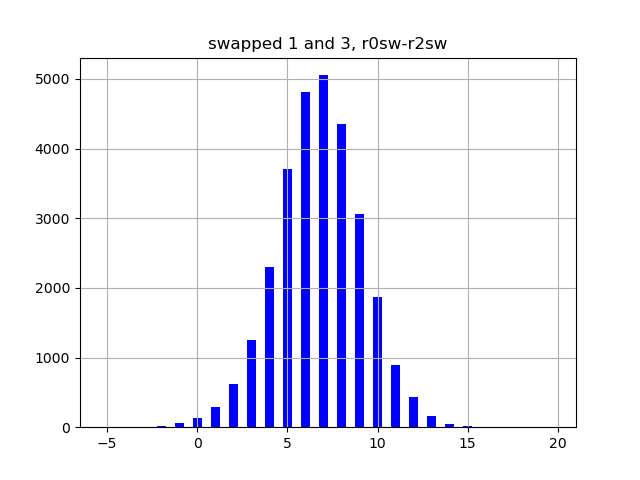

In [40]:
# Plot the histograms of rising edges only.
print(f'Length of r0 {len(r0)}' )

fig, ax = plt.subplots()

ax.hist(r0sw-r2sw, bins=50, range=(-5,20), align='left', color='b', label='rising ch0')

ax.set_title('swapped 1 and 3, r0sw-r2sw')
ax.grid(True)

plt.show()

In [37]:
# Look at the means and std dev of each...
regMean = (r2-r0).mean()
regStdDev = (r2-r0).std()
swMean = (r0sw-r2sw).mean()
swStdDev = (r0sw-r2sw).std()

print(f'Regular 12-34 setup mean {regMean:.4} and std dev {regStdDev:.4}, swapped mean {swMean:.4} and std \
dev {swStdDev:.4}')

Regular 12-34 setup mean 4.339 and std dev 2.536, swapped mean 6.749 and std dev 2.431


In [39]:
twiceTime = regMean+swMean
distMeas = (78+13/16.-6-7/16.)*0.0254 # separation of 1 and 3 in meters

print(f'Twice time is {twiceTime:.4} ns, distance is {distMeas:.4} m, so ...')
print(f'       speed is {distMeas/(twiceTime/2.*1e-9):.4}' )

Twice time is 11.09 ns, distance is 1.838 m, so ...
       speed is 3.316e+08
